In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gp
import shapely
import fiona
import numpy as np

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# Organising the data frame
Since the reports are considered "biannual" the csv files were separated as two; the first showcasing incident reports from Term 1 to Term 2 and the second showcasing incident reports from Term 3 to Term 4 of 2020.

This meant that I'd need to merge the two files into one file to achieve more efficiency in taking the data frames out for analysis.

In [3]:
path = "/Users/audre/Desktop/Annual school offence reports 2020/"
file_list = [path + f for f in os.listdir(path) if f.startswith('2020-biannual-incident-report-n')]
csv_list = []
for file in sorted(file_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

csv_merged = pd.concat(csv_list, ignore_index=True)
csv_merged.to_csv(path + '2020_biannual_incident_report_full.csv', index=False)

In [4]:
sorted(file_list)
print(file_list)

['/Users/audre/Desktop/Annual school offence reports 2020/2020-biannual-incident-report-n1.csv', '/Users/audre/Desktop/Annual school offence reports 2020/2020-biannual-incident-report-n2.csv']


In [5]:
os.listdir(path)

['2020-biannual-incident-report-n1.csv',
 '2020-biannual-incident-report-n2.csv',
 '2020_biannual_incident_report_full.csv']

In [6]:
if os.path.isfile("2020_biannual_incident_report_full.csv"):
    filepath = "2020_biannual_incident_report_full.csv"
    print("loading from file")
else:
    filepath = "/Users/audre/Desktop/Annual school offence reports 2020/2020_biannual_incident_report_full.csv/"
    print("loading from the internet")

# filepath = "2020-biannual-two-incident-report.csv" "https://data.cese.nsw.gov.au/data/dataset/incident-reports-nsw-government-schools/resource/736931f6-0806-4d78-9a04-c9b229ece8dd"

id_data = pd.read_csv(filepath)
print("done")

loading from file
done


# Incident Reports for NSW Government school-offences throughout the year 2020 
By: Audrey Cipres
###### - This dataset provides records of entries on individual incidents related to school offences in NSW government schools reported by school principals or staff.
###### - The data begins its entries and records biannually from the 1st of January to early Decemeber 2020
###### - References of the individual's identities, along with staff and those involved, in each report have been removed to ensure the safety of their personal health and information.

In [7]:
id_data.shape

(1866, 13)

Rows = 1866
Columns = 13

In [8]:
id_data.head()

,Case Number,Date/Time Opened,Term,Incident Group,Operational Directorate,Principal Network Name,Primary Category,Primary Sub-Category,Secondary Category,Summary of the Incident (External Distribution),Incident Priority Rating,Incident Occurred,File_Name
0,S-2020-167351,4/01/2020 21:55,Term 1,Emergency Situation,Metropolitan South,Beverly Hills,Structural Fire,NaN,NaN,School play equipment burnt by fire. Emergency...,1,On workplace grounds,2020-biannual-incident-report-n1.csv
1,S-2020-167468,7/01/2020 13:06,Term 1,Emergency Situation,Metropolitan North,Ryde,Flood,NaN,NaN,A staff member reported that a fire hydrant ha...,1,On workplace grounds,2020-biannual-incident-report-n1.csv
2,S-2020-167631,10/01/2020 13:32,Term 1,Emergency Situation,Metropolitan North,Mount Druitt,Police Operation,NaN,NaN,A police operation was conducted on school gro...,1,On workplace grounds,2020-biannual-incident-report-n1.csv
3,S-2020-168065,21/01/2020 9:25,Term 1,Violence,Regional South,Campbelltown,Indecent Assault,NaN,NaN,XXXX students disclosed they were XXXX by anot...,1,On workplace grounds,2020-biannual-incident-report-n1.csv
4,S-2020-168069,21/01/2020 9:54,Term 1,Emergency Situation,Metropolitan South & South West,Port Hacking,Severe Storm,NaN,Utility Failure,School and neighbouring property have suffered...,1,On workplace grounds,2020-biannual-incident-report-n1.csv


In [9]:
row_one = id_data.iloc[1]
row_one

Case Number                                                                            S-2020-167468
Date/Time Opened                                                                     7/01/2020 13:06
Term                                                                                          Term 1
Incident Group                                                                   Emergency Situation
Operational Directorate                                                           Metropolitan North
Principal Network Name                                                                          Ryde
Primary Category                                                                               Flood
Primary Sub-Category                                                                             NaN
Secondary Category                                                                               NaN
Summary of the Incident (External Distribution)    A staff member reported that a fire hydr

# The Main Simple Questions
**What** is the most prevalent type of incident, or incident groups, reported by NSW Government Schools in the Year 2020?

**Why** is this incident reported so much throughout the year

**Where** do these recorded incident reports occur in the most within NSW?

# Main Incident Group Report counts (Bar Graphs)

# Incident Groups
- Welfare Concern (health and wellbeing)
- Emergency Situation
- Criminal Activity
- Use of illegal Substances
- Violence
- Possession of a weapon
- Malicious Use of Technology

In [10]:
id_data["Incident Group"].value_counts()

Violence                       905
Welfare                        442
Emergency Situation            318
Malicious Use of Technology     65
Criminal Activity               53
Weapon                          49
Substances                      34
Name: Incident Group, dtype: int64

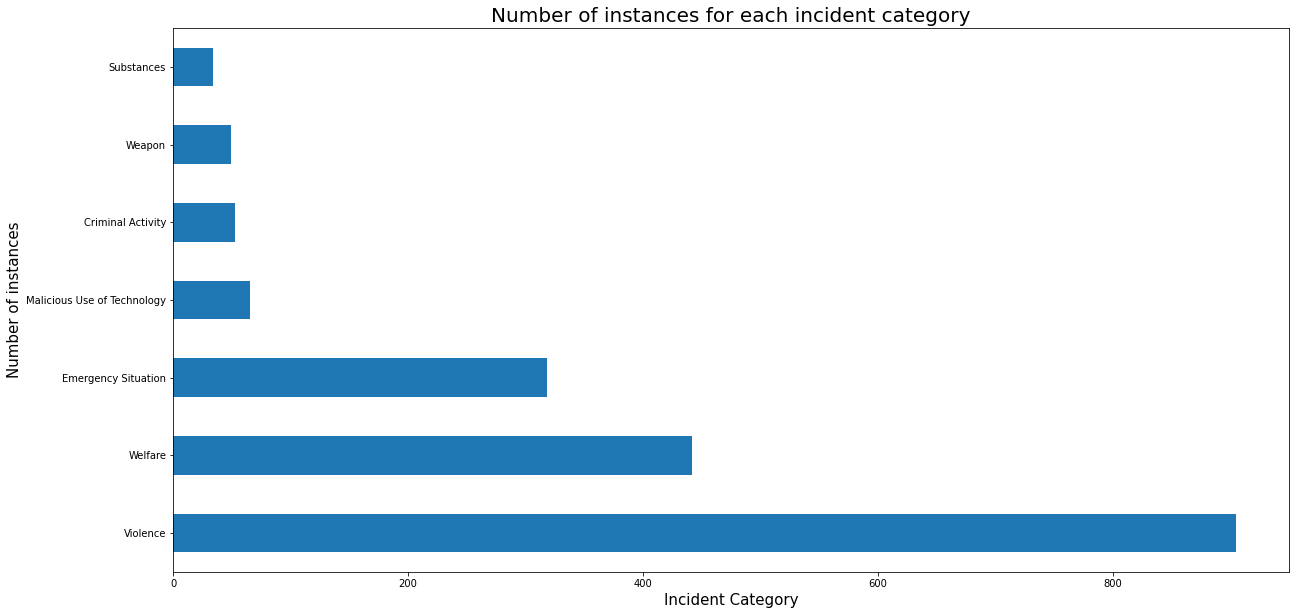

In [11]:
id_data["Incident Group"].value_counts().plot(kind="barh")
plt.title("Number of instances for each incident category", fontsize=20)
plt.ylabel("Number of instances", fontsize=15)
plt.xlabel("Incident Category", fontsize=15)
plt.show()

**Why** is Violence the most reported?

- Bullying

- Tolerance level a school, mainly the school Principal, has on certain incidents which determines their likeliness to prioritise and report said incidents to the Incident Report and Service Hotline (e.g. the cognitive behaviour and mannerisms of the principal or staff); 

*In other words, the possible chance of bias instigating a false narrative behind these reports*

Initially looking into this without research, I thought *"Does the tolerance level a school has for certain types of incidents determine the likeliness for staff or principals to report on them?"*.

Though it's difficult to delve deeper into the third considering we don't look into the cognitive or psychological mannerisms behind the decisions of each incident report, however the presence of a bias forming a falsified report narrative is a possibility.

# Primary Category Incident Report Counts (Bar Graphs)

In [12]:
id_data["Primary Category"].value_counts()

Assault                                547
Indecent Assault                       242
Utility Failure                        170
Student Welfare Concerns               160
Attempted Suicide                      123
Student Behaviour                      105
Allegations Of Sexual  Assault          92
Nuisance Use of Technology              55
Self Harm                               54
Bomb Threat                             53
Possession of a Weapon                  49
Flood                                   49
Police Operation                        42
Severe Storm                            36
Usage and Consumption of Substances     26
Accidental Assault                      24
Structural Fire                         16
Sexting                                 10
Possession of a Substance                5
Bushfire                                 5
Supply of a Substance                    3
Name: Primary Category, dtype: int64

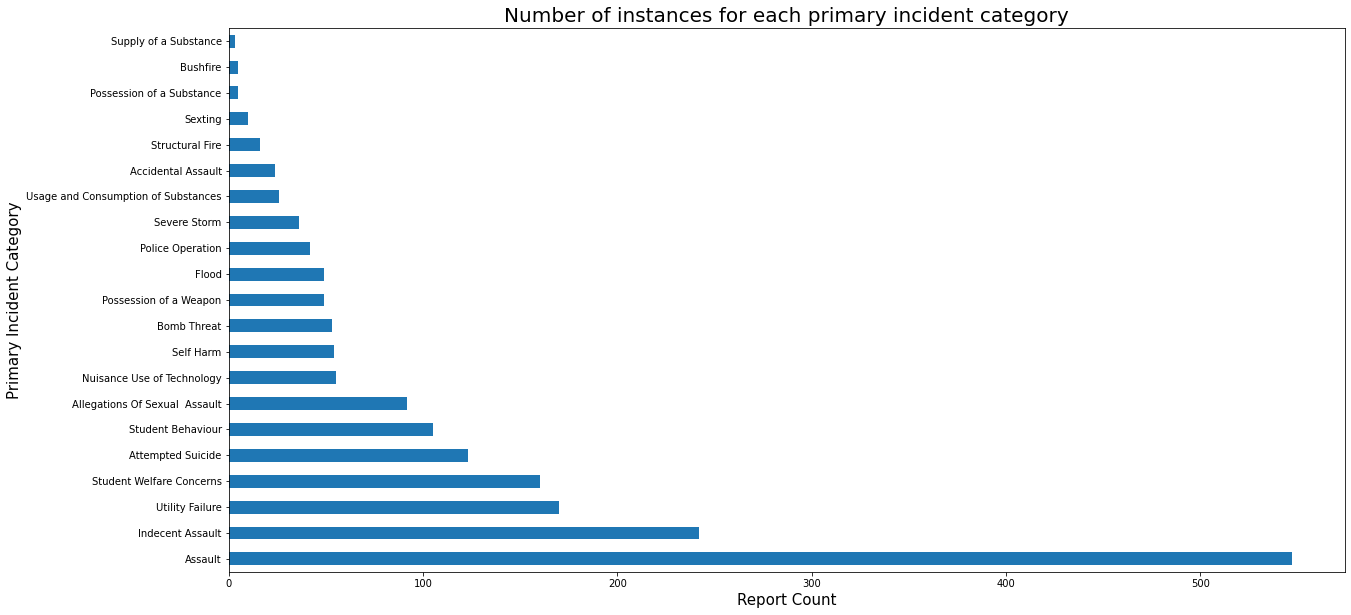

In [13]:
id_data["Primary Category"].value_counts().plot(kind="barh")
plt.title("Number of instances for each primary incident category", fontsize=20)
plt.ylabel("Primary Incident Category", fontsize=15)
plt.xlabel("Report Count", fontsize=15)
plt.show()

In [14]:
df_pc = pd.DataFrame(id_data, columns=["Primary Category", "Term "])
df_pc_full = df_pc.groupby(["Term ", "Primary Category"]).size()
df_pc_full

Term    Primary Category                   
Term 1  Accidental Assault                       3
        Allegations Of Sexual  Assault          23
        Assault                                154
        Attempted Suicide                       23
        Bomb Threat                              4
                                              ... 
Term 4  Student Behaviour                       35
        Student Welfare Concerns                62
        Supply of a Substance                    1
        Usage and Consumption of Substances      7
        Utility Failure                         46
Length: 76, dtype: int64

In [15]:
#Term 1
df_pc_full.iloc[:20]

Term    Primary Category                   
Term 1  Accidental Assault                       3
        Allegations Of Sexual  Assault          23
        Assault                                154
        Attempted Suicide                       23
        Bomb Threat                              4
        Bushfire                                 3
        Flood                                    9
        Indecent Assault                        63
        Nuisance Use of Technology               9
        Police Operation                        15
        Possession of a Substance                2
        Possession of a Weapon                   8
        Self Harm                               10
        Severe Storm                            15
        Sexting                                  3
        Structural Fire                          5
        Student Behaviour                       28
        Student Welfare Concerns                28
        Usage and Consumption of Subst

In [16]:
T2 = df_pc_full.iloc[20:37]
T2

Term    Primary Category                   
Term 2  Accidental Assault                       6
        Allegations Of Sexual  Assault          22
        Assault                                142
        Attempted Suicide                       26
        Indecent Assault                        49
        Nuisance Use of Technology               3
        Police Operation                         5
        Possession of a Substance                2
        Possession of a Weapon                  12
        Self Harm                               12
        Sexting                                  2
        Structural Fire                          4
        Student Behaviour                       17
        Student Welfare Concerns                25
        Supply of a Substance                    2
        Usage and Consumption of Substances      6
        Utility Failure                         33
dtype: int64

In [17]:
T3 = df_pc_full.iloc[37:56]
T3

Term    Primary Category                   
Term 3  Accidental Assault                       9
        Allegations Of Sexual  Assault          30
        Assault                                149
        Attempted Suicide                       44
        Bomb Threat                              1
        Flood                                   22
        Indecent Assault                        80
        Nuisance Use of Technology              34
        Police Operation                        10
        Possession of a Substance                1
        Possession of a Weapon                  15
        Self Harm                               24
        Severe Storm                            11
        Sexting                                  2
        Structural Fire                          1
        Student Behaviour                       25
        Student Welfare Concerns                45
        Usage and Consumption of Substances      7
        Utility Failure               

In [18]:
T4 = df_pc_full.iloc[56:76]
T4

Term    Primary Category                   
Term 4  Accidental Assault                       6
        Allegations Of Sexual  Assault          17
        Assault                                102
        Attempted Suicide                       30
        Bomb Threat                             48
        Bushfire                                 2
        Flood                                   18
        Indecent Assault                        50
        Nuisance Use of Technology               9
        Police Operation                        12
        Possession of a Weapon                  14
        Self Harm                                8
        Severe Storm                            10
        Sexting                                  3
        Structural Fire                          6
        Student Behaviour                       35
        Student Welfare Concerns                62
        Supply of a Substance                    1
        Usage and Consumption of Subst

# Primary Category report counts throughout the school year 2020

Primary Category
 Student Welfare Concerns    AxesSubplot(0.125,0.125;0.775x0.755)
Assault                      AxesSubplot(0.125,0.125;0.775x0.755)
Attempted Suicide            AxesSubplot(0.125,0.125;0.775x0.755)
Self Harm                    AxesSubplot(0.125,0.125;0.775x0.755)
Student Welfare Concerns     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Incident Count, dtype: object

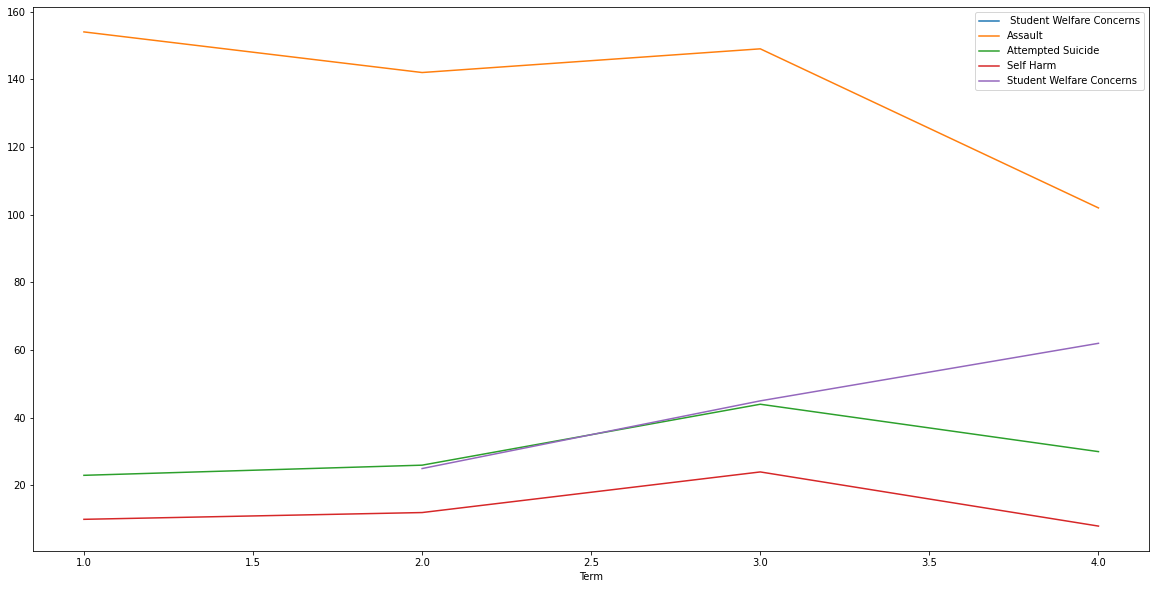

In [28]:
df_ass_as_sh = pd.DataFrame({'Term' : [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4], 'Primary Category' : ['Assault', 'Attempted Suicide', 'Self Harm', ' Student Welfare Concerns', 'Assault', 'Attempted Suicide', 'Self Harm','Student Welfare Concerns', 'Assault', 'Attempted Suicide', 'Self Harm', 'Student Welfare Concerns', 'Assault', 'Attempted Suicide', 'Self Harm', 'Student Welfare Concerns'], 'Incident Count' : [154, 23, 10, 28, 142, 26, 12, 25, 149, 44, 24, 45, 102, 30, 8, 62]})

df_ass_as_sh.set_index('Term', inplace=True)
df_ass_as_sh.groupby('Primary Category')['Incident Count'].plot(legend=True)

In [20]:
df_ig = pd.DataFrame(id_data, columns=["Incident Group", "Term "])
df_ig

,Incident Group,Term
0,Emergency Situation,Term 1
1,Emergency Situation,Term 1
2,Emergency Situation,Term 1
3,Violence,Term 1
4,Emergency Situation,Term 1
...,...,...
1861,Emergency Situation,Term 4
1862,Violence,Term 4
1863,Violence,Term 4
1864,Violence,Term 4


In [21]:
full = df_ig.groupby(["Term ", "Incident Group"]).size()
full

Term    Incident Group             
Term 1  Criminal Activity                4
        Emergency Situation            112
        Malicious Use of Technology     12
        Substances                       8
        Violence                       243
        Weapon                           8
        Welfare                         89
Term 2  Emergency Situation             42
        Malicious Use of Technology      5
        Substances                      10
        Violence                       219
        Weapon                          12
        Welfare                         80
Term 3  Criminal Activity                1
        Emergency Situation             70
        Malicious Use of Technology     36
        Substances                       8
        Violence                       268
        Weapon                          15
        Welfare                        138
Term 4  Criminal Activity               48
        Emergency Situation             94
        Malicious 

# The number of counted reports for each Incident Group throughout the year 2020

Incident Group
Criminal Activity              AxesSubplot(0.125,0.125;0.775x0.755)
Emergency Situation            AxesSubplot(0.125,0.125;0.775x0.755)
Malicious Use of Technology    AxesSubplot(0.125,0.125;0.775x0.755)
Substances                     AxesSubplot(0.125,0.125;0.775x0.755)
Violence                       AxesSubplot(0.125,0.125;0.775x0.755)
Weapon                         AxesSubplot(0.125,0.125;0.775x0.755)
Welfare                        AxesSubplot(0.125,0.125;0.775x0.755)
Name: Incident Count, dtype: object

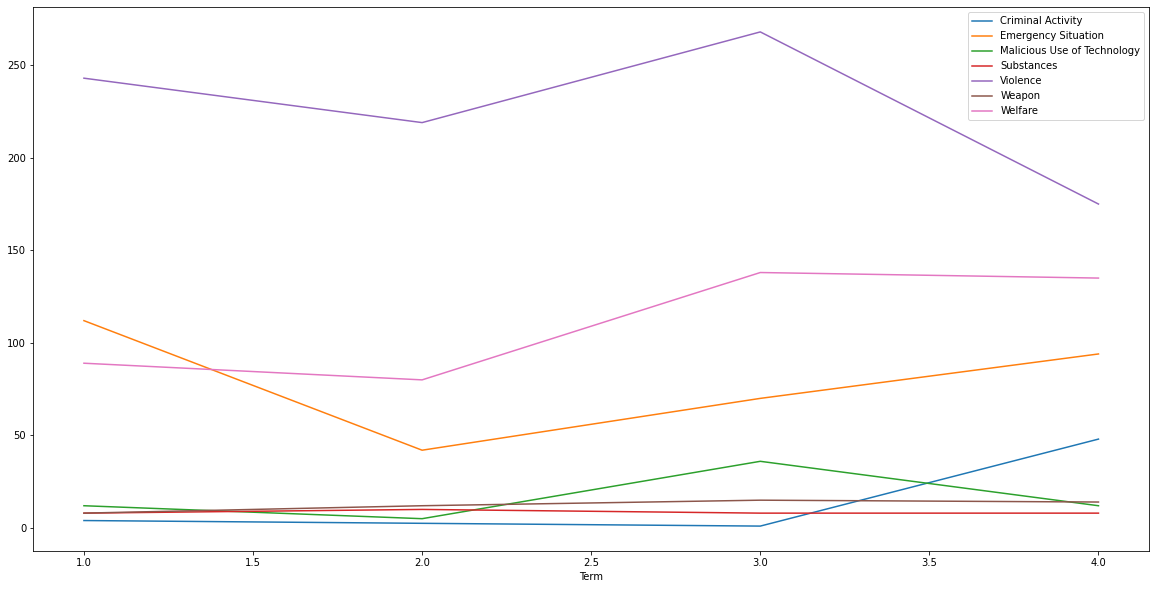

In [22]:
df_full = pd.DataFrame({'Term' : [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4], 
                        'Incident Group' : ['Criminal Activity', 'Emergency Situation', 'Malicious Use of Technology', 'Substances', 'Violence', 'Weapon', 'Welfare', 'Emergency Situation', 'Malicious Use of Technology', 'Substances', 'Violence', 'Weapon', 'Welfare', 'Criminal Activity', 'Emergency Situation', 'Malicious Use of Technology', 'Substances', 'Violence', 'Weapon', 'Welfare', 'Criminal Activity', 'Emergency Situation', 'Malicious Use of Technology', 'Substances', 'Violence', 'Weapon', 'Welfare'], 
                        'Incident Count' : [4, 112, 12, 8, 243, 8, 89, 42, 5, 10, 219, 12, 80, 1, 70, 36, 8, 268, 15, 138, 48, 94, 12, 8, 175, 14, 135]})

df_full.set_index('Term', inplace=True)
df_full.groupby('Incident Group')['Incident Count'].plot(legend=True)

In [ ]:
df_gir = df_full.groupby('Incident Group')['Incident Count'].plot(legend=True)
df_gir()

Incident Group
Malicious use of Technology    AxesSubplot(0.125,0.125;0.775x0.755)
Violence                       AxesSubplot(0.125,0.125;0.775x0.755)
Welfare                        AxesSubplot(0.125,0.125;0.775x0.755)
Name: Incident Count, dtype: object

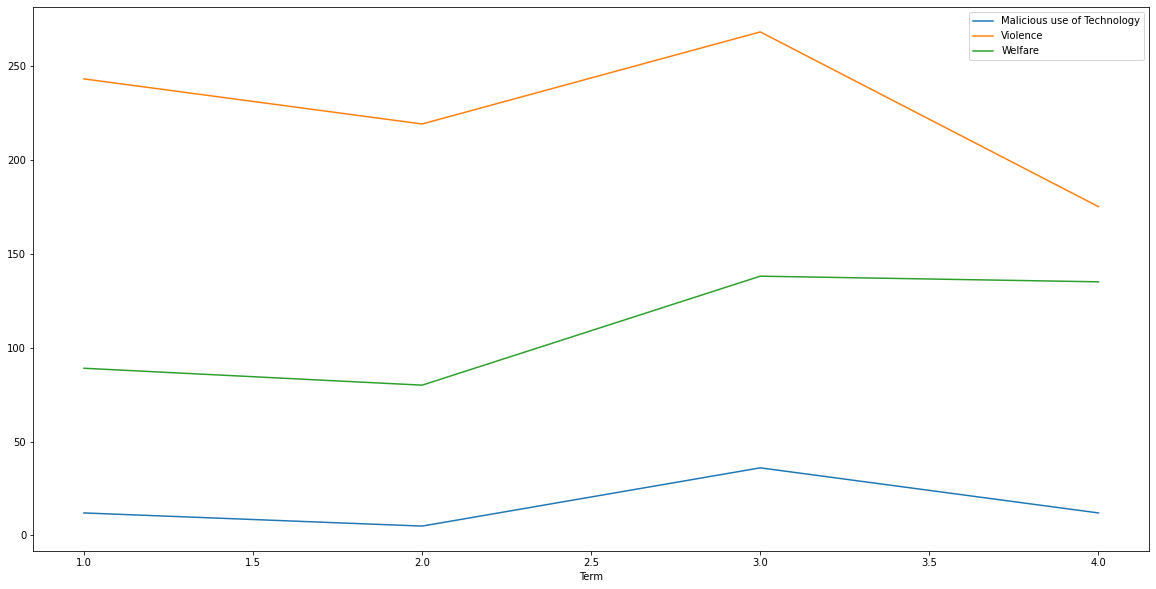

In [23]:
df_V_and_W = pd.DataFrame ({'Term' : [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], 
                            'Incident Group' : ['Violence', 'Welfare', 'Malicious use of Technology', 'Violence', 'Welfare', 'Malicious use of Technology', 'Violence', 'Welfare', 'Malicious use of Technology', 'Violence', 'Welfare', 'Malicious use of Technology'], 
                            'Incident Count' : [243, 89, 12, 219, 80, 5, 268, 138, 36, 175, 135, 12]})

df_V_and_W.set_index('Term', inplace=True)
df_V_and_W.groupby('Incident Group')['Incident Count'].plot(legend=True)


The incident count data for Violence, Student Welfare and Malicious use of Technology all are directly proportionate to each other; when one increases in value overtime, the rest also increase.

Hence implying the impact of bullying; 
- Malicious use of Technology = CyberBullying
- Violence = Physcial Bullying
- Student Welfare = The result of these incidents

This relationship correlates to how bullying greatly influences overall student welfare both physically and mentally with both categories in alliance with each other.

In [24]:
df_dto = pd.DataFrame(id_data, columns=["Incident Group", "Date/Time Opened"])
display(df_dto)

,Incident Group,Date/Time Opened
0,Emergency Situation,4/01/2020 21:55
1,Emergency Situation,7/01/2020 13:06
2,Emergency Situation,10/01/2020 13:32
3,Violence,21/01/2020 9:25
4,Emergency Situation,21/01/2020 9:54
...,...,...
1861,Emergency Situation,16/12/2020 14:26
1862,Violence,16/12/2020 15:27
1863,Violence,17/12/2020 9:11
1864,Violence,17/12/2020 13:03


<AxesSubplot:>

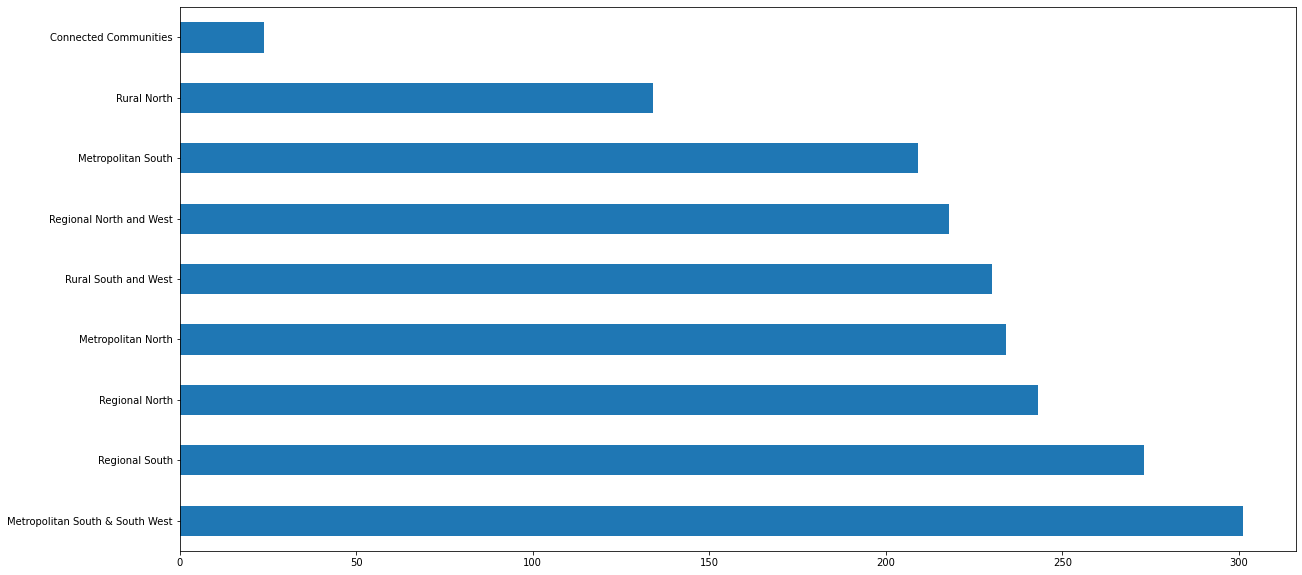

In [25]:
id_data["Operational Directorate"].value_counts().plot(kind="barh")

In [26]:
df_od = pd.DataFrame(id_data, columns=["Operational Directorate", "Incident Group"])
dF_odvc = df_od.groupby(["Operational Directorate", "Incident Group"]).size()
dF_odvc


Operational Directorate          Incident Group             
Connected Communities            Emergency Situation              6
                                 Violence                        15
                                 Weapon                           1
                                 Welfare                          2
Metropolitan North               Criminal Activity               15
                                 Emergency Situation             49
                                 Malicious Use of Technology      7
                                 Substances                       3
                                 Violence                       105
                                 Weapon                           8
                                 Welfare                         47
Metropolitan South               Criminal Activity                2
                                 Emergency Situation             26
                                 Malicious Use of Techn

Incident Group
Violence    AxesSubplot(0.125,0.125;0.775x0.755)
Welfare     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Incident Count, dtype: object

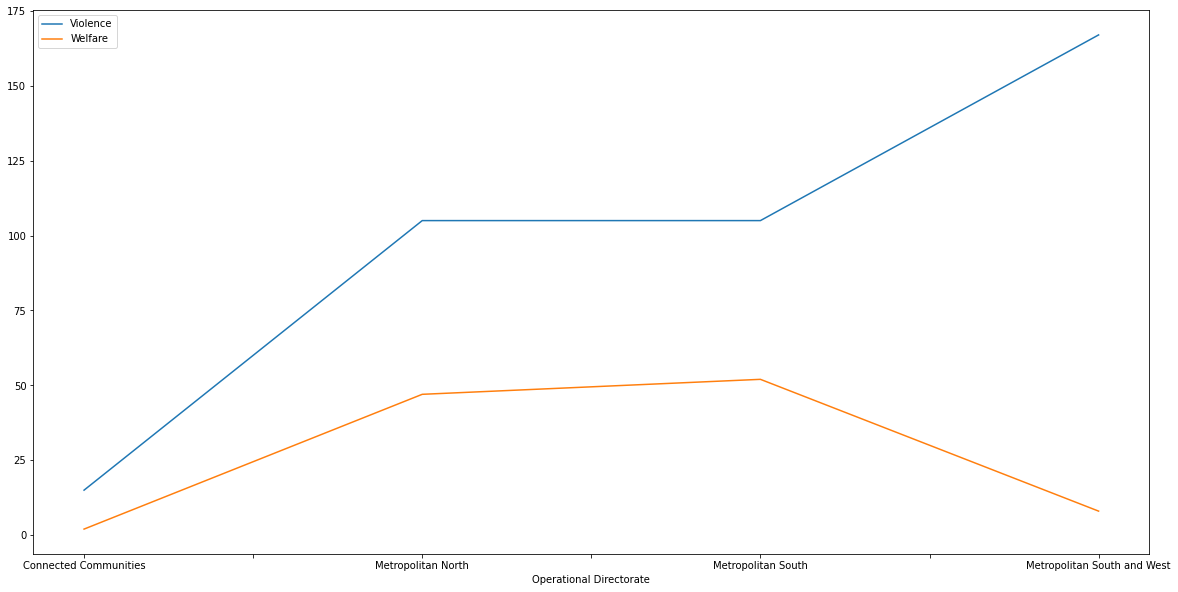

In [27]:
df2 = pd.DataFrame({'Operational Directorate' : ['Connected Communities', 'Connected Communities', 'Metropolitan North', 'Metropolitan North', 'Metropolitan South', 'Metropolitan South', 'Metropolitan South and South West', 'Metropolitan South and West'], 
                    'Incident Group' : ['Violence', 'Welfare', 'Violence', 'Welfare', 'Violence', 'Welfare', 'Violence', 'Welfare'], 
                    'Incident Count' : [15, 2, 105, 47, 105, 52, 167, 8]})
df2.set_index('Operational Directorate', inplace=True)
df2.groupby('Incident Group')['Incident Count'].plot(legend=True)


# Conclusion
- Violence was the most prominent reported school-offense incident throughout 2020 and is most prevalent in the Metropolitan South and South West Directorates
- In turn, this infuences the overall student welfare incident report count in schools implying the presence of bullying being the main reason behind most of these cases
- The directly proportional relationship between the incident count data for Malicious use of technology, Violence and Welfare emphasises this conclusion